# 6.5 Unsupervised Machine Learning - Clustering

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\julia\anaconda3\Mental Health Service Ability vs Suicides'

In [4]:
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'mh_s_combined.pkl'))

## 1. Data Cleaning

In [6]:
df_merge.head(1)

,Id,Title Code,Title,Country,Year_x,Value_x,Data Collection Date_x,Title Code Suicide,Suicide rates,Location,Year_y,Gender,Value_y,Data Collection Date_y,_merge
0,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2019,Female,5.67,2021-02-08T23:00:00.000Z,both


In [7]:
# Create a new data set without non-numerical values
df_corr = df_merge.drop(columns=['Id', 'Title Code', 'Title', 'Country', 'Data Collection Date_x', 'Title Code Suicide', 'Suicide rates', 'Location', 'Gender', 'Data Collection Date_y', '_merge'])

In [8]:
# Renaming columns to better understand them in correlation
df_corr.rename(columns = {'Year_x' : 'Year of MH Services', 'Value_x' : 'Count of MH Services', 'Year_y' : 'Year of Suicide', 'Value_y' : 'Count of Suicides',}, inplace = True)

In [9]:
df_corr.head(1)

,Year of MH Services,Count of MH Services,Year of Suicide,Count of Suicides
0,2016,0.231,2019,5.67


## 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df_corr).score(df_corr) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\clust

[-485454132783.3068,
 -95382802669.30191,
 -46052973027.15955,
 -26948697064.56698,
 -13009080163.28554,
 -9343374407.736452,
 -6459919879.74486,
 -4127211990.7521753,
 -3385713214.9713516]

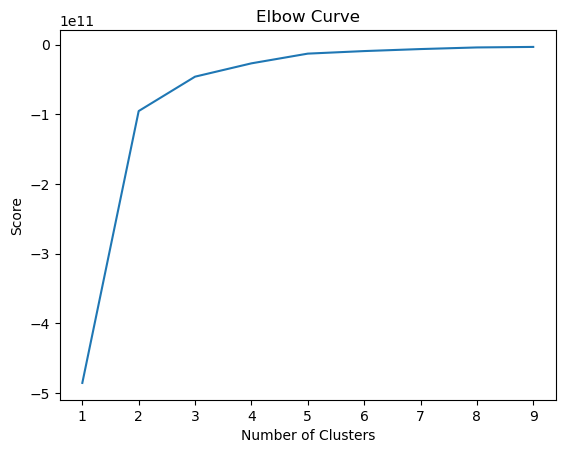

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from one to two and a jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

## 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_corr)

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
df_corr['clusters'] = kmeans.fit_predict(df_corr)

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df_corr.head()

,Year of MH Services,Count of MH Services,Year of Suicide,Count of Suicides,clusters
0,2016,0.231,2019,5.67,0
1,2016,0.231,2019,5.96,0
2,2016,0.231,2019,6.19,0
3,2016,0.231,2018,5.57,0
4,2016,0.231,2018,5.91,0


In [19]:
df_corr['clusters'].value_counts()

clusters
0    96060
2      780
1      480
Name: count, dtype: int64

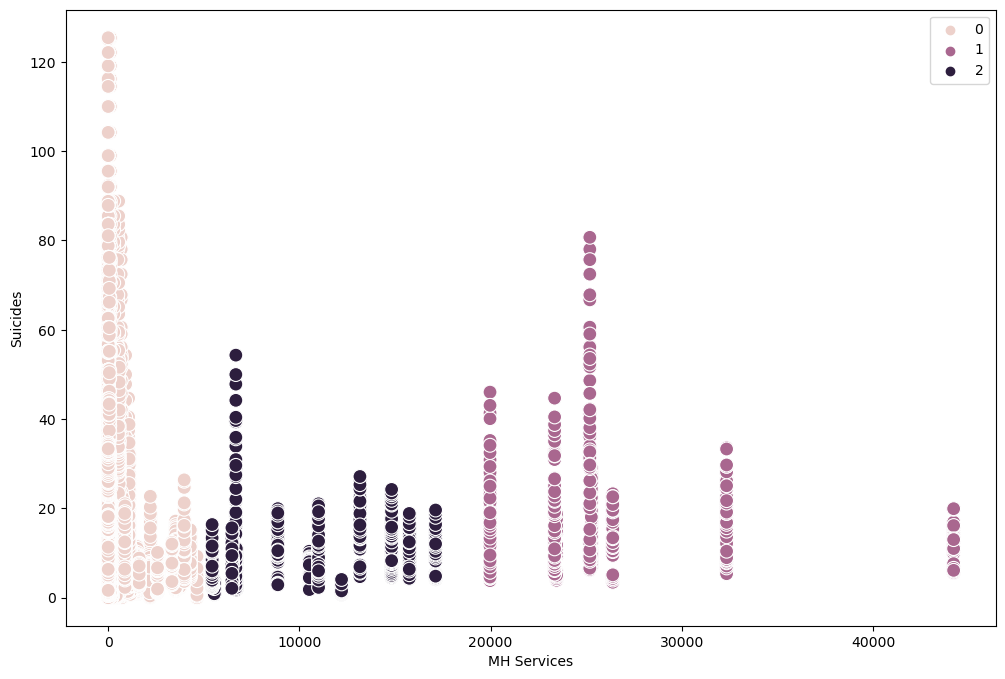

In [23]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_corr['Count of MH Services'], y=df_corr['Count of Suicides'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('MH Services') # Label x-axis.
plt.ylabel('Suicides') # Label y-axis.
plt.show()

The scatterplot might indicate that the relationship between MH services and suicides is more nuanced and requires additional variables (e. g. socioeconomic factors, access to healthcare, geographical location or demographic characteristics) or a different approach to clustering. There's significant overlap between the clusters, suggesting that the counts of MH services and suicides alone might not be sufficient to distinguish distinct groups.

In [26]:
df_corr.loc[df_corr['clusters'] == 2, 'cluster'] = 'dark purple'
df_corr.loc[df_corr['clusters'] == 1, 'cluster'] = 'purple'
df_corr.loc[df_corr['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_corr.groupby('cluster').agg({'Count of MH Services':['mean', 'median'], 
                         'Count of Suicides':['mean', 'median']})

Count of MH Services             Count of Suicides        
                            mean      median              mean  median
cluster                                                               
dark purple         10328.439769  10516.4980          9.365282   7.775
pink                   62.097766      1.1280         11.242878   7.990
purple              27516.716500  25224.5825         17.249062  14.100

The purple cluster has the best stats in all categories.

These results are useful for future steps of an analytics pipeline, because they suggest to analyze more variables. The hypothesis 'The more MH Services, the less suicides' doesn't seem to be proven so easily. There are far more factors we have to explore. 